# Model training

## Linear regression

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

Text(0, 0.5, 'y')

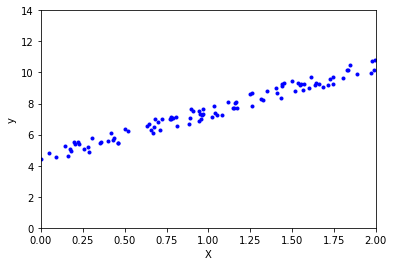

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, 'b.')
plt.xlim((0, 2))
plt.ylim((0, 14))
plt.xlabel('X')
plt.ylabel('y')

### Exact formula

In [9]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.54127016],
       [2.95097482]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.54127016],
       [10.4432198 ]])

Text(0, 0.5, 'y')

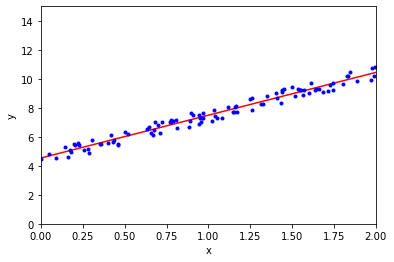

In [13]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.xlabel('x')
plt.ylabel('y')

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.54127016]), array([[2.95097482]]))

In [15]:
lin_reg.predict(X_new)

array([[ 4.54127016],
       [10.4432198 ]])

### Batch gradient descent

In [16]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
theta

array([[4.54127016],
       [2.95097482]])

### Stochastic gradiend descent

In [17]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
        
theta

array([[4.52838585],
       [2.96017087]])

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52653354]), array([2.95396267]))

## Polynomial regression

In [62]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.03574999, 0.52077641]]), array([2.04089562]))

Text(0, 0.5, 'y')

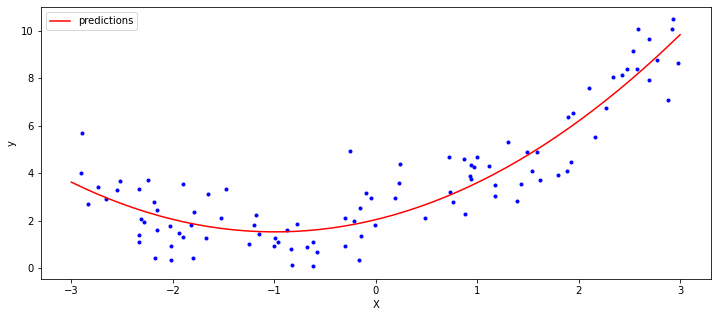

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

X_new = np.linspace(-3, 3)
y_reg = lin_reg.predict(poly_features.transform(X_new.reshape(-1, 1)))

plt.figure(figsize=(12,5))
plt.plot(X, y, 'b.', label='')
plt.plot(X_new, y_reg, 'r-', label='predictions')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

### Learning curves

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend()

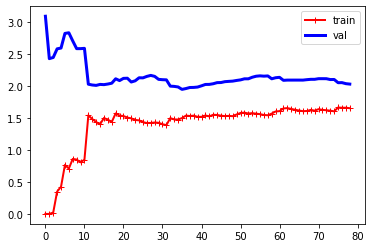

In [58]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 5.0)

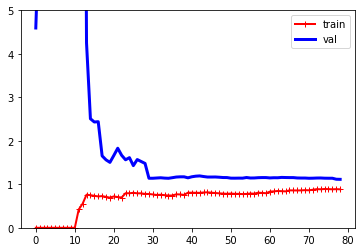

In [59]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(poly_regression, X, y)
plt.ylim((0, 5))

## Regularization

### Ridge

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.86526041]])

In [72]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.84663946])

### LASSO

In [73]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.81128045])

### ElasticNet

In [74]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.81205689])

## Questions

## 1

Nie można używać równania normalnego. Można metod gradientowych

### 2
Różne skale powodują, że algorytmy uczenia według malejącego spadku wolniej osiągają zbieżność. Problem występuje także w przypadku regularyzacji grzbietowej

### 3
Nie, funkcja jest wypukła.

### 4
Nie zawsze.
Algorytm wsadowego schodzenia po gradiencie cechuje się większą stabilnością i zawsze osiągnie to samo minimum lokalne
Algorytm SGD oraz mini-batche SGD mogą wyskoczyć z minimum lokalnego i znaleźć inne z powodu bardziej chaotycznego działania

### 5
Narastanie błędu walidacyjnego jest objawem przetrenowania modelu. W takim wypadku należy rozważyć uproszczenie modelu lub dostarczenie większej liczby próbek uczących.

### 6
Nie jest to dobry pomysł. Chwilowy wzrost błędy walidacyjnego może być związany z wychodzeniem z minimum lokalnego. W rezultacie po kilku epokach model może wpaść w lepsze minimum lokalne. Dobrą praktyką jest zapamiętywanie stanu najlepszego modelu. Trening należy przerwać w przypadku wykrycia wzrostu błędu walidacyjnego przez N kolejnych epoch, gdzie N jest hiperparametrem uczenia.

### 7
Najszybciej optymale rozwiązanie osiągnie algorytm SGD. Zbieżność osiągnie algorytm wsadowy. Zbieżność pozostałych algorytmów można osiągnąć poprzez ciągłe zmniejszanie kroku uczenia.

### 8
Duża przerwa pomiędzy wykresem błędu dla danych treningowych i walidacyjnych świadczy o tym, że model dobrze sobie radzi z danymi treningowymi, a słabo z walidacyjnymi, więc jest przetrenowany.

Możliwe rozwiązania:
- stworzenie prostszego modelu
- powiększenie zbioru treningowego
- wprowadzenie regularyzacji

### 9
Duże wartości błędów świadczą o tym, że nasz model cechuje się dużym obciążeniem (jest zbyt prosty). W takim wypadku należy zmniejszyć parametr /alpha w celu zmniejszenia kary za złożoność modelu

### 10
**a** - standardowa regresja liniowa ma tendencję do przetrenowania

**b** - LASSO używamy jeżeli chcemy wyeliminować wpływ nieistotnych cech

**c** - ElasticNet jest złożeniem regresji grzbietowej oraz LASSO. LASSO zachowuje się nieprzewidywalnie gdy cechy są skorelowane

### 11
Klasyfikator softmax jest klasyfikatorem jedno-wyjściowym, więc nie nadaje się do naszego zadania, w którym na wyjściu mamy otrzymać parę etykiet. Z tego powodu należy wtrenować dwa modele regresji logistycznej